In [1]:
import datajoint as dj
import numpy as np
from minio import Minio
import json
import yaml
import sys, os

sys.path.append('./lib')
from utilities import *
from initialization_of_db import *

In [2]:
from atlas_pipeline import reference, brain

Connecting root@127.0.0.1:3306


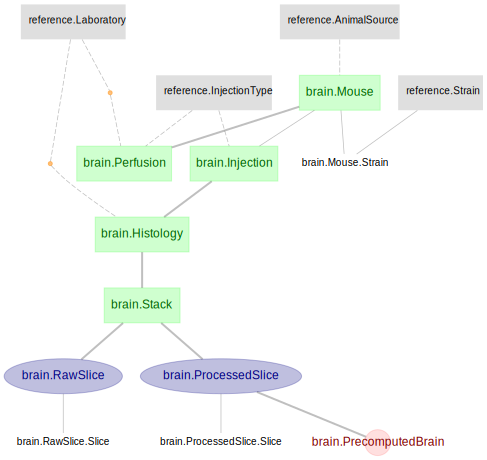

In [3]:
erd = dj.ERD(reference) + dj.ERD(brain)
erd

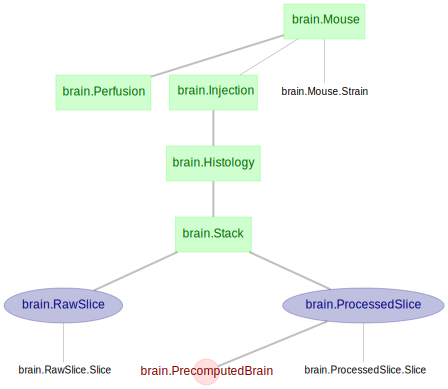

In [4]:
dj.ERD(brain)

In [ ]:
for brain_name in brain_names_list:

    print("\n"+brain_name+' being added')
    
    # Fill in MOUSE info
    Mouse.insert1(dict(mouse=brain_name,
                       date_of_birth='2020-01-01' if brain_name == 'UCSD001' else '2017-12-05',
                       sex='M',
                       strain='C57',
                       weight=-1,
                       animal_source='Unknown')
                  , skip_duplicates=True)
        
    # Fill in HISTOLOGY info
    Histology.insert1((brain_name,
                   'Unknown', # region
                   '20', # thickness
                   brain_names_dic[brain_name][3],  # orientation
                   brain_names_dic[brain_name][0],  # counter_stain
                   brain_names_dic[brain_name][1],  # lab
                   'unknown') # series  
                 ,skip_duplicates=True)
    
    # Try to load STACK_sorted_filenames.txt from AWS S3, on failure the default values are filled
    try:
        _, total_slices, valid_slices = get_sorted_filenames( brain_name, return_type="string" )
    except Exception as e:
        sorted_fn_data = ""
        total_slices   = -1
        valid_slices   = -1
        print('No sorted_filenames.txt exists for ' + brain_name)
        print(e)
        
    # Fill in BRAIN STACK INFO
    Stack.insert1(dict(mouse=brain_name,
                       stack_name=brain_name,
                       num_slices=total_slices,
                       num_valid_slices=valid_slices,
                       channels=brain_names_dic[brain_name][0].count('/') + 1,
                       human_annotated=brain_names_dic[brain_name][2],
                       planar_resolution_um=-1,
                       section_thickness_um=20)
                  ,skip_duplicates=True)

## Populate Routine

In [ ]:
brain.RawSlice.populate()
brain.ProcessedSlice.populate()
brain.PrecomputedBrain.populate()